# 데이터 로드

In [408]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings

warnings.filterwarnings(action='ignore')
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 1000)

plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
train = pd.read_csv("/Users/LeeJunhyeok/Documents/train.csv")
test = pd.read_csv("/Users/LeeJunhyeok/Documents/test.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [326]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [325]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

# 결측치 처리

In [8]:
regex = re.compile('[\w]+, ([\w]+)')
def mr_miss(x):
    return regex.findall(x)[0]
train['Title'] = train['Name'].apply(mr_miss)
test['Title'] = test['Name'].apply(mr_miss)

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


## 호칭을 train과 test를 서로 맞춰 줌

In [239]:
train.groupby('Title')['Age'].mean()

Title
Col       55.000000
Dr        43.444444
Master     4.574167
Miss      21.818792
Mr        32.549074
Mrs       36.009174
Ms        28.000000
Rev       45.222222
Name: Age, dtype: float64

In [231]:
test.groupby('Title')['Age'].mean()

Title
Col       50.000000
Dr        53.000000
Master     7.406471
Miss      21.774844
Mr        32.419970
Mrs       38.904762
Ms        38.903226
Rev       35.500000
Name: Age, dtype: float64

In [12]:
#train['Age'][['Title']=='Mr']
train['Age'][train['Title'].str.contains('Mr')].mean()

33.12154150197628

0.42857142857142855


0

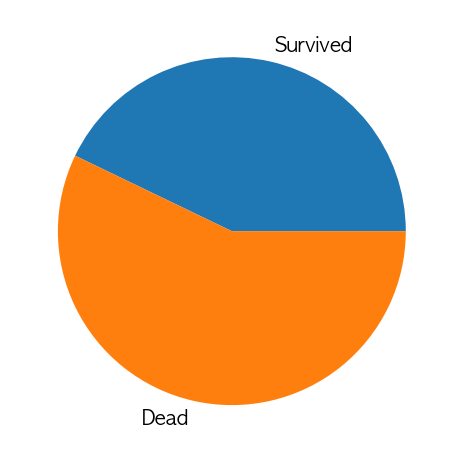

In [237]:
# 호칭별 생존률과 호칭당 생존률 파이그래프를 그리기 위한 함수 생성
def title_ratio(feature):
    survived = len(train[train['Survived'] == 1] [train['Title']==feature])
    dead = len(train[train['Survived'] == 0] [train['Title']==feature])
    plt.pie([survived, dead],labels=['Survived', 'Dead'])
    print(survived / len(train[train['Title']==feature]))

title_ratio('Dr')
len(train[train['Survived'] == 1] [train['Title']=='Lady'])

In [236]:
# 호칭당 생존 및 성별 나이를 체크 과정
train[train['Title']=='Capt'] # dead
train[train['Title']=='Don'] # dead
train[train['Title']=='Mme'] # dead
test[test['Title']=='Rev'] # dead

train[train['Title']=='Mlle'] # survived
train[train['Title']=='Mme'] # survived
train[train['Title']=='the'] # survived
train[train['Title']=='Major'] # survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.50,C104,S,Major
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.55,B38,S,Major


In [238]:
# 호칭중에 남자이며 생존률이 0인 호칭을 하나로 통일
train['Title'].replace('the','Mr',inplace=True)
train['Title'].replace('Capt','Rev',inplace=True) 
train['Title'].replace('Don','Rev',inplace=True) 
train['Title'].replace('Jonkheer','Rev',inplace=True) 

# 호칭을 평균 나이에 맞추어 통일
train['Title'].replace('Sir','Col',inplace=True) 
train['Title'].replace('the','Mrs',inplace=True) 
train['Title'].replace('Mlle','Miss',inplace=True)
train['Title'].replace('Mme','Miss',inplace=True)
train['Title'].replace('Lady','Mrs',inplace=True)
test['Title'].replace('Dona','Mrs',inplace=True)
train['Title'].replace('Major','Dr',inplace=True)

## 결측 나이를 호칭의 평균 나이로 치환

In [16]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,Mr
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,Mrs
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,Miss
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,Mr
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,Mr


In [17]:
# <훈련 데이터> 입력값(호칭)에 따라 평균나이를 리턴하는 함수생성
def fill_age_Train(Title):
    return train['Age'][train['Title'].str.contains(Title)].mean()

while True:
    for i in list(train['Title'].unique()):
        train['Age']=np.where((train['Age'].isnull()==True) & (train['Title']==i), fill_age_Train(i), train['Age'])
    if sum(train['Age'].isnull())==0:
        break

In [20]:
# <test 데이터> 입력값(호칭)에 따라 평균나이를 리턴하는 함수생성
def fill_age_Test(Title):
    return test['Age'][test['Title'].str.contains(Title)].mean()

while True:
    for i in list(test['Title'].unique()):
        test['Age']=np.where((test['Age'].isnull()==True) & (test['Title']==i), fill_age_Test(i), test['Age'])
    if sum(test['Age'].isnull())==0:
        break

KeyboardInterrupt: 

In [ ]:
train[train['Title']=='Miss']

In [37]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [36]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

## Train의 Embarked의 결측치를 최빈값으로 대체

In [30]:
Embarked_max = train['Embarked'].value_counts().idxmax()
train['Embarked'] = train['Embarked'].fillna(Embarked_max)

## Test의 Fare의 결측치를 최빈값으로 대체

In [35]:
Fare_max = test['Fare'].value_counts().idxmax()
Fare_max
test['Fare'] = test['Fare'].fillna(Fare_max)

# 가정 설정 단계

In [60]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    # train에 있는 컬럼을 가져와 값들을 순서 없이 추출
    feature_size = feature_ratio.size
    # 전체 데이터 수
    feature_index = feature_ratio.index
    # train에 있는 컬럼을 가져와 값들을 순서 없이 추출한 값의 index를 가지고 옴
    survived = train[train['Survived'] == 1] [feature].value_counts()
    # Survivde 에서 1인 값들을 기준으로 feature의 값들을 추출
    dead = train[train['Survived']==0][feature].value_counts()
    # Survivde 에서 0인 값들을 기준으로 feature의 값들을 추출

    plt.plot(aspect='auto')
    plt.pie(feature_ratio,labels=feature_index, autopct = '%1.1f%%')
    # autopct = 퍼센트 단위를 정해줌
    plt.title(feature + '\'s ratio in total')
    plt.show()

    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survived', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index)+ '\'s ratio')

    plt.show

## 성별에 비율과 성별에 따른 생존율 비율

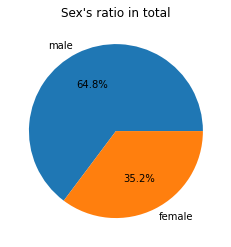

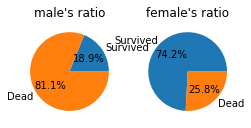

In [61]:
pie_chart('Sex')

- 총 인원 중 남자의 비율이 64.8%로 여자에 비해 높지만 남자의 81.1%로 사망하였다
- 총 인원 중 여자의 비율이 25.8%로 남자에 비해 낮지만 여자의 74.2%로 생존하였다

## 선박지에 따른 생존률 변화

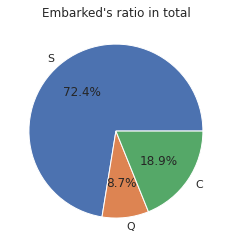

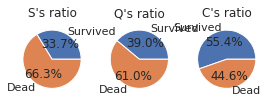

In [16]:
pie_chart('Embarked')

In [18]:
train.groupby('Embarked')['Fare'].mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [19]:
train.groupby('Embarked')['Fare'].agg([max, min])

,max,min
Embarked,,
C,512.3292,4.0125
Q,90.0000,6.7500
S,263.0000,0.0000


In [20]:
train.groupby('Pclass')['Fare'].agg([max, min])

,max,min
Pclass,,
1,512.3292,0.0
2,73.5000,0.0
3,69.5500,0.0


- 승선지에 따른 비율을 확인한 결과 C의 생존율이 유독 상대적으로 높았는데 
- 이는 1등급 선실에 자리가 많기 때문이다.

이름을 통한 나이 계산  
티켓을 통한 생존률 변화  
티켓 가격이 0인 사람들은 승무원일 것이다.  
승무원의 생존률은 어떨까?  
파트너의 수에 따른 생존률은 어떨까?  

- c 클래스가 생존율이 비교적 높으며 가장 숫자가 적으며 평균 요금이 가장 높다.  
- 1 등실 생존률은 63%인데 반해, 3 등급 생존률은 24.2%에 불과하다.
- Fare가 0인 사람들은 1명만이 살아남았다.

In [17]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [19]:
train[train['Cabin'].str.contains('C23', na=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


In [20]:
train[train['Ticket'].str.contains('PC 177')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C
537,538,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,NaN,C


In [21]:
train[train['Ticket'].str.contains('C.A.')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,NaN,S
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0000,NaN,S
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S
161,162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S
234,235,0,2,"Leyson, Mr. Robert William Norman",male,24.0,0,0,C.A. 29566,10.5000,NaN,S


In [23]:
train['Ticket'].count()

891

## 혼자 승선한 인원과 다인 승선 인원에 따른 차이

In [202]:
train.groupby([train['SibSp'],train['Survived']])['PassengerId'].count()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: PassengerId, dtype: int64

In [203]:
train.groupby([train['Parch'],train['Survived']])['PassengerId'].count()

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: PassengerId, dtype: int64

<Figure size 432x288 with 0 Axes>

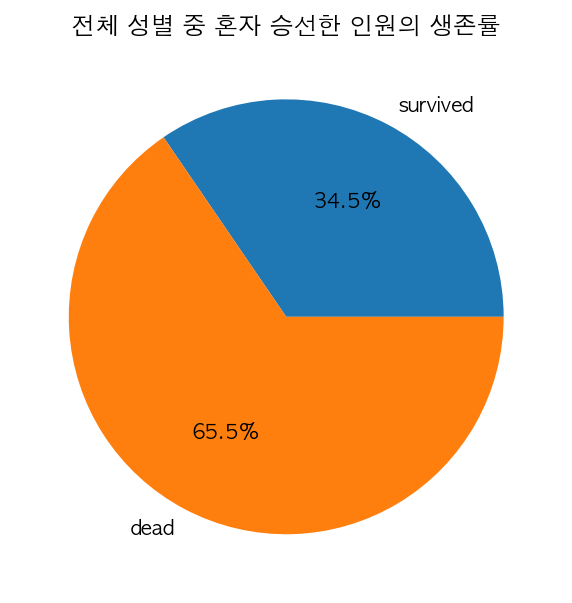

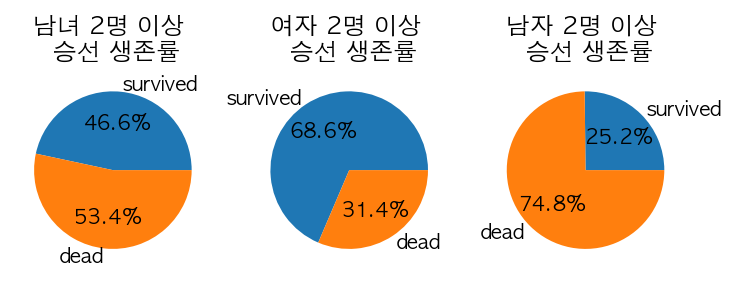

In [200]:
# 호칭별 생존률과 호칭당 생존률 파이그래프를 그리기 위한 함수 생성
for i in range(2):
    fig = plt.figure()
    if i == 0: # 전체 성별 중 혼자 승선한 인원의 생존률 파이 그래프
        survived = len(train[train['Survived'] == 1] [train['SibSp'] == 0])
        dead = len(train[train['Survived'] == 0] [train['SibSp'] == 0])
        
        fig = plt.figure(figsize=(8, 5))
        
        ax1 = fig.add_subplot(111)
        ax1.pie([survived, dead], labels = ['survived', 'dead'], autopct = '%1.1f%%')
        plt.title('전체 성별 중 혼자 승선한 인원의 생존률')
    
    else: # 전체 성별 중 2명 이상 승선한 인원의 생존률 파이 그래프
        survived = len(train[train['Survived'] == 1] [train['SibSp'] >= i])
        dead = len(train[train['Survived'] == 0] [train['SibSp'] >= i])

        ax2 = fig.add_subplot(231)
        ax2.pie([survived, dead], labels = ['survived', 'dead'], autopct = '%1.1f%%')
        plt.title('남녀 2명 이상 \n 승선 생존률')
        
        # 여성 인원 중 2명 이상 승성한 인원의 생존률 파이 그래프
        F_survived = len(train[train['Survived'] == 1] [(train['SibSp'] >= i)&(train['Sex']=='female')])
        F_dead =  len(train[train['Survived'] == 0] [(train['SibSp'] >= i)&(train['Sex']=='female')])
        
        ax3 = fig.add_subplot(232)
        ax3.pie([F_survived, F_dead], labels = ['survived', 'dead'], autopct = '%1.1f%%')
        plt.title('여자 2명 이상 \n 승선 생존률')
        
        # 여성 인원 중 2명 이상 승성한 인원의 생존률 파이 그래프
        M_survived = len(train[train['Survived'] == 1] [(train['SibSp'] >= i)&(train['Sex']=='male')])
        M_dead =  len(train[train['Survived'] == 0] [(train['SibSp'] >= i)&(train['Sex']=='male')])
        
        ax3 = fig.add_subplot(233)
        ax3.pie([M_survived, M_dead], labels = ['survived', 'dead'], autopct = '%1.1f%%')
        plt.title('남자 2명 이상 \n 승선 생존률')

<Figure size 432x288 with 0 Axes>

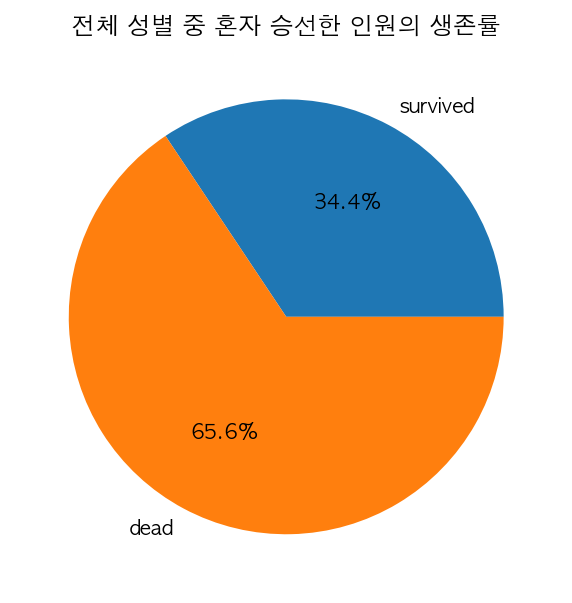

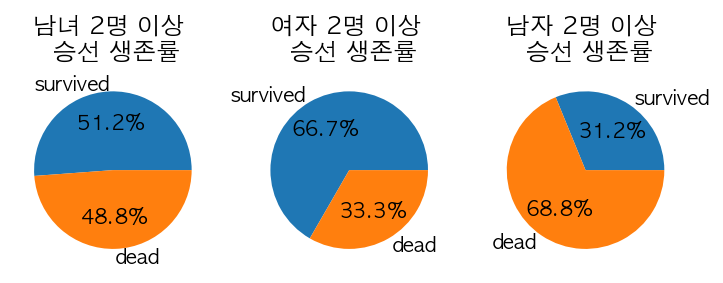

In [201]:
for i in range(2):
    fig = plt.figure()
    if i == 0: # 전체 성별 중 혼자 승선한 인원의 생존률 파이 그래프
        survived = len(train[train['Survived'] == 1] [train['Parch'] == 0])
        dead = len(train[train['Survived'] == 0] [train['Parch'] == 0])
        
        fig = plt.figure(figsize=(8, 5))
        
        ax1 = fig.add_subplot(111)
        ax1.pie([survived, dead], labels = ['survived', 'dead'], autopct = '%1.1f%%')
        plt.title('전체 성별 중 혼자 승선한 인원의 생존률')
    
    else: # 전체 성별 중 2명 이상 승선한 인원의 생존률 파이 그래프
        survived = len(train[train['Survived'] == 1] [train['Parch'] >= i])
        dead = len(train[train['Survived'] == 0] [train['Parch'] >= i])

        ax2 = fig.add_subplot(231)
        ax2.pie([survived, dead], labels = ['survived', 'dead'], autopct = '%1.1f%%')
        plt.title('남녀 2명 이상 \n 승선 생존률')
        
        # 여성 인원 중 2명 이상 승성한 인원의 생존률 파이 그래프
        F_survived = len(train[train['Survived'] == 1] [(train['Parch'] >= i)&(train['Sex']=='female')])
        F_dead =  len(train[train['Survived'] == 0] [(train['Parch'] >= i)&(train['Sex']=='female')])
        
        ax3 = fig.add_subplot(232)
        ax3.pie([F_survived, F_dead], labels = ['survived', 'dead'], autopct = '%1.1f%%')
        plt.title('여자 2명 이상 \n 승선 생존률')
        
        # 여성 인원 중 2명 이상 승성한 인원의 생존률 파이 그래프
        M_survived = len(train[train['Survived'] == 1] [(train['Parch'] >= i)&(train['Sex']=='male')])
        M_dead =  len(train[train['Survived'] == 0] [(train['Parch'] >= i)&(train['Sex']=='male')])
        
        ax3 = fig.add_subplot(233)
        ax3.pie([M_survived, M_dead], labels = ['survived', 'dead'], autopct = '%1.1f%%')
        plt.title('남자 2명 이상 \n 승선 생존률')

혼자 승선한 인원보다 가족, 형제, 자매끼리 탄 인원의 생존률이 더 높다.  
특히 여자 인원에서 생존률이 크게 올라감을 알수 있다.  
하지만 4명 이상의 동승객일 경우 생존률이 크게 낮아진다.  
(SibSp의 경우 5인 이상 생존률이 0%)

## 티켓가격이 0인 사람들의 생존률 분석

In [258]:
np.sort(train['Fare'].unique())

array([  0.    ,   4.0125,   5.    ,   6.2375,   6.4375,   6.45  ,
         6.4958,   6.75  ,   6.8583,   6.95  ,   6.975 ,   7.0458,
         7.05  ,   7.0542,   7.125 ,   7.1417,   7.225 ,   7.2292,
         7.25  ,   7.3125,   7.4958,   7.5208,   7.55  ,   7.6292,
         7.65  ,   7.725 ,   7.7292,   7.7333,   7.7375,   7.7417,
         7.75  ,   7.775 ,   7.7875,   7.7958,   7.8   ,   7.8292,
         7.8542,   7.875 ,   7.8792,   7.8875,   7.8958,   7.925 ,
         8.0292,   8.05  ,   8.1125,   8.1375,   8.1583,   8.3   ,
         8.3625,   8.4042,   8.4333,   8.4583,   8.5167,   8.6542,
         8.6625,   8.6833,   8.7125,   8.85  ,   9.    ,   9.2167,
         9.225 ,   9.35  ,   9.475 ,   9.4833,   9.5   ,   9.5875,
         9.825 ,   9.8375,   9.8417,   9.8458,  10.1708,  10.4625,
        10.5   ,  10.5167,  11.1333,  11.2417,  11.5   ,  12.    ,
        12.275 ,  12.2875,  12.35  ,  12.475 ,  12.525 ,  12.65  ,
        12.875 ,  13.    ,  13.4167,  13.5   ,  13.7917,  13.8

In [18]:
train.sort_values(by=['Fare'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.00,0,0,LINE,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.00,0,0,LINE,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.00,0,0,LINE,0.0000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.00,0,0,112059,0.0000,B94,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


([<matplotlib.patches.Wedge at 0x7ffa2decaee0>,
 [Text(1.075962358309037, 0.22870287165240302, 'Survived'),
  Text(-1.0759623529558597, -0.22870289683711933, 'Dead')],
 [Text(0.5868885590776565, 0.12474702090131072, '6.7%'),
  Text(-0.5868885561577416, -0.12474703463842872, '93.3%')])

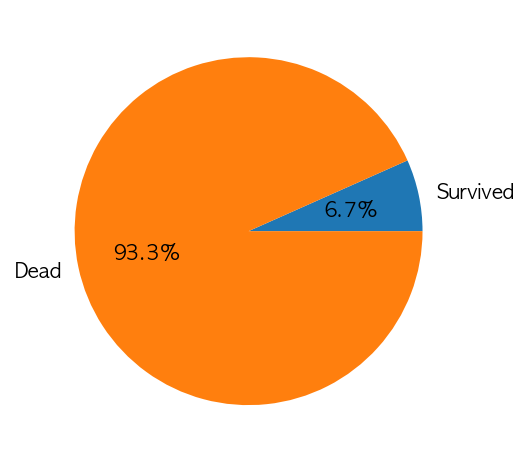

In [240]:
mask1 = train['Fare'] == 0
Fare = train.loc[mask1,:]
Fare[Fare['Survived']==1]
plt.pie([len(Fare[Fare['Survived']==1]), len(Fare[Fare['Survived']==0])], labels=['Survived', 'Dead'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7ffa291c64f0>,
 [Text(0.975711919138001, 0.507923469483385, 'Survived'),
  Text(-0.9757119429156137, -0.507923423807013, 'Dead')],
 [Text(0.5322065013480005, 0.2770491651727554, '15.3%'),
  Text(-0.5322065143176073, -0.2770491402583707, '84.7%')])

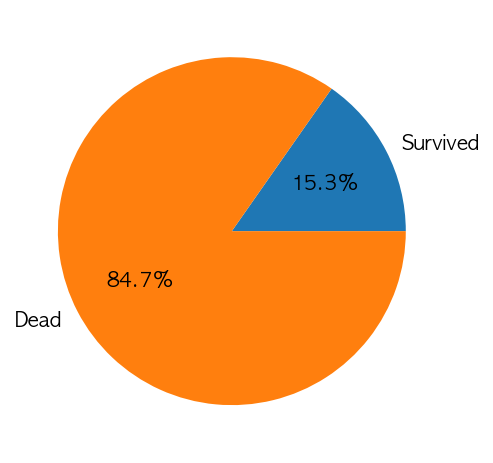

In [241]:
mask1 = (0 < train['Fare']) & (train['Fare']<= 7.4958)
Fare = train.loc[mask1,:]
Fare[Fare['Survived']==1]
plt.pie([len(Fare[Fare['Survived']==1]), len(Fare[Fare['Survived']==0])], labels=['Survived', 'Dead'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7ffa10661160>,
 [Text(0.8227251377775452, 0.7301529618298617, 'Survived'),
  Text(-0.8227251035966173, -0.7301530003444041, 'Dead')],
 [Text(0.44875916606047916, 0.39826525190719725, '23.1%'),
  Text(-0.44875914741633666, -0.3982652729151295, '76.9%')])

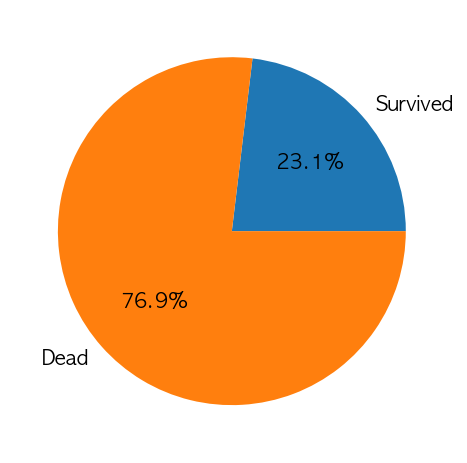

In [250]:
mask1 = (7.4958 < train['Fare']) & (train['Fare']<= 10.5167	)
Fare = train.loc[mask1,:]
Fare[Fare['Survived']==1]
plt.pie([len(Fare[Fare['Survived']==1]), len(Fare[Fare['Survived']==0])], labels=['Survived', 'Dead'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7ffa167be910>,
 [Text(0.12493817499669006, 1.0928817193221307, 'Survived'),
  Text(-0.12493817499669045, -1.0928817193221307, 'Dead')],
 [Text(0.06814809545274003, 0.5961173014484349, '46.4%'),
  Text(-0.06814809545274024, -0.5961173014484349, '53.6%')])

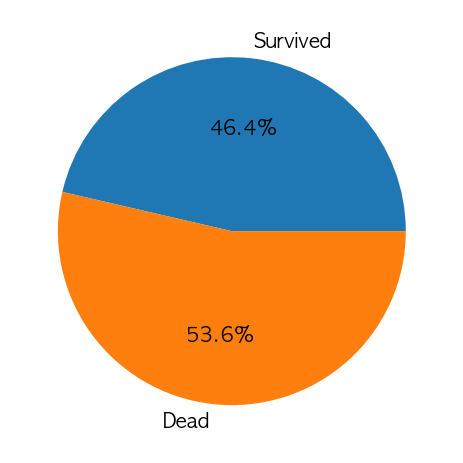

In [251]:
mask1 = (10.5167 < train['Fare']) & (train['Fare']<= 13.5000)
Fare = train.loc[mask1,:]
Fare[Fare['Survived']==1]
plt.pie([len(Fare[Fare['Survived']==1]), len(Fare[Fare['Survived']==0])], labels=['Survived', 'Dead'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7ffa0fde05b0>,
 [Text(0.46630586953858116, 0.9962724707798906, 'Survived'),
  Text(-0.4663058695385817, -0.9962724707798903, 'Dead')],
 [Text(0.25434865611195334, 0.543421347698122, '36.1%'),
  Text(-0.2543486561119536, -0.5434213476981219, '63.9%')])

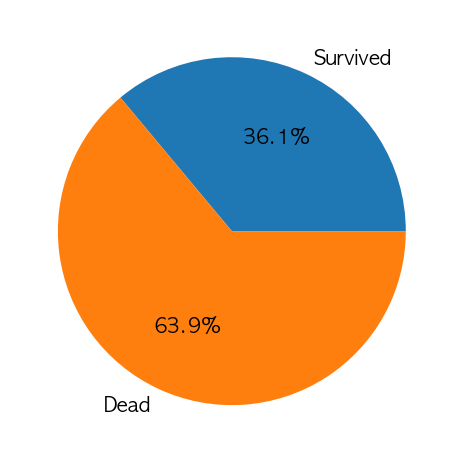

In [252]:
mask1 = (13.5000 < train['Fare']) & (train['Fare']<= 16.1000)
Fare = train.loc[mask1,:]
Fare[Fare['Survived']==1]
plt.pie([len(Fare[Fare['Survived']==1]), len(Fare[Fare['Survived']==0])], labels=['Survived', 'Dead'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7ffa00b3eb80>,
 [Text(-0.6016430102375324, 0.9208831023709365, 'Survived'),
  Text(0.6016430102375327, -0.9208831023709363, 'Dead')],
 [Text(-0.3281689146750177, 0.5022998740205108, '68.4%'),
  Text(0.3281689146750178, -0.5022998740205107, '31.6%')])

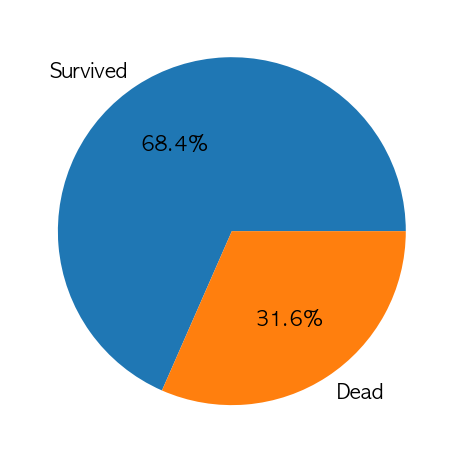

In [303]:
mask1 = (16.1 < train['Fare']) & (train['Fare']<= 19.5000)
Fare = train.loc[mask1,:]
Fare[Fare['Survived']==1]
plt.pie([len(Fare[Fare['Survived']==1]), len(Fare[Fare['Survived']==0])], labels=['Survived', 'Dead'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7ffa00e2a190>,
 [Text(0.720346786112299, 0.8313245501834299, 'Survived'),
  Text(-0.7203467082780743, -0.8313246176271596, 'Dead')],
 [Text(0.3929164287885267, 0.45344975464550713, '27.3%'),
  Text(-0.39291638633349507, -0.4534497914329961, '72.7%')])

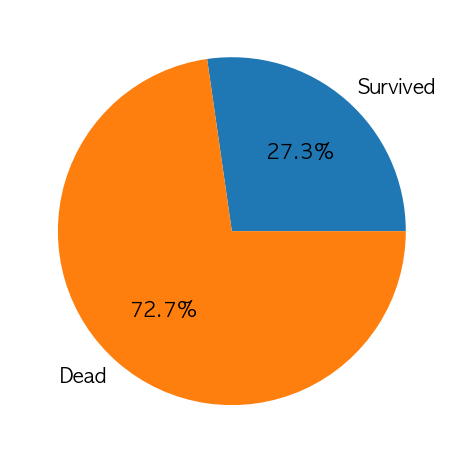

In [304]:
mask1 = (19.5 < train['Fare']) & (train['Fare']<= 21.6792)
Fare = train.loc[mask1,:]
Fare[Fare['Survived']==1]
plt.pie([len(Fare[Fare['Survived']==1]), len(Fare[Fare['Survived']==0])], labels=['Survived', 'Dead'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7ffa01f7a760>,
 [Text(-1.0461621424642782, 0.33991877217145816, 'Survived'),
  Text(1.0461621185951564, -0.3399188456330337, 'Dead')],
 [Text(-0.5706338958896062, 0.18541023936624987, '90.0%'),
  Text(0.5706338828700852, -0.18541027943620017, '10.0%')])

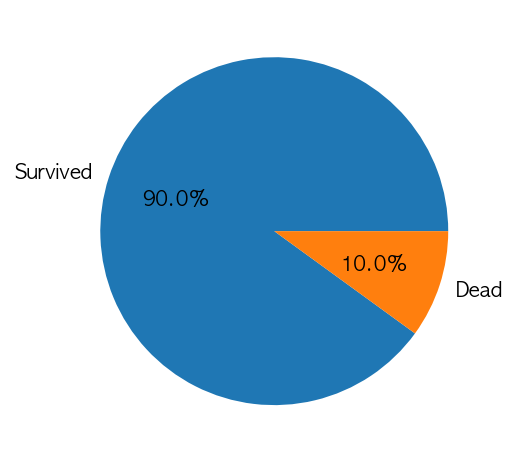

In [305]:
mask1 = (21.6792 < train['Fare']) & (train['Fare']<= 23.25)
Fare = train.loc[mask1,:]
Fare[Fare['Survived']==1]
plt.pie([len(Fare[Fare['Survived']==1]), len(Fare[Fare['Survived']==0])], labels=['Survived', 'Dead'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7ffa01fb8160>,
 [Text(0.8899186877588753, 0.6465637858537406, 'Survived'),
  Text(-0.8899186574910392, -0.6465638275138399, 'Dead')],
 [Text(0.4854101933230228, 0.35267115592022213, '20.0%'),
  Text(-0.485410176813294, -0.3526711786439127, '80.0%')])

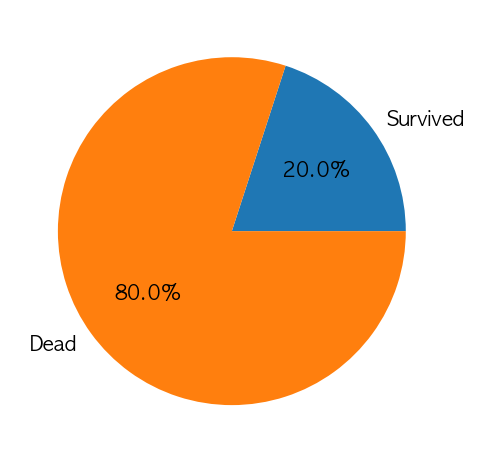

In [306]:
mask1 = (23.25 < train['Fare']) & (train['Fare']<= 25.9292)
Fare = train.loc[mask1,:]
Fare[Fare['Survived']==1]
plt.pie([len(Fare[Fare['Survived']==1]), len(Fare[Fare['Survived']==0])], labels=['Survived', 'Dead'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7ffa02b3ac10>,
 [Text(0.055714135492219465, 1.0985881553641268, 'Survived'),
  Text(-0.055714238349465386, -1.098588150147788, 'Dead')],
 [Text(0.030389528450301524, 0.5992299029258873, '48.4%'),
  Text(-0.030389584554253845, -0.5992299000806116, '51.6%')])

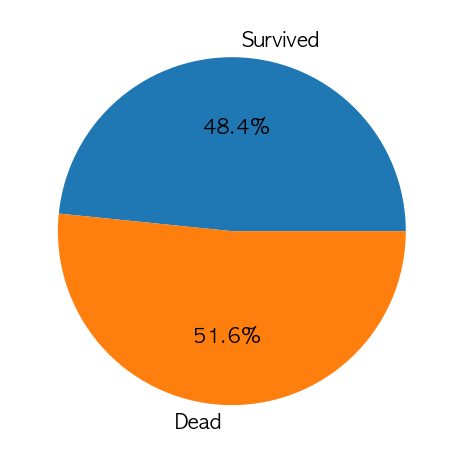

In [307]:
mask1 = train['Fare'] == 26
Fare = train.loc[mask1,:]
Fare[Fare['Survived']==1]
plt.pie([len(Fare[Fare['Survived']==1]), len(Fare[Fare['Survived']==0])], labels=['Survived', 'Dead'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7ffa02b81970>,
 [Text(-0.47727208651780745, 0.9910657674599294, 'Survived'),
  Text(0.4772720865178069, -0.9910657674599296, 'Dead')],
 [Text(-0.26033022900971314, 0.5405813277054159, '64.3%'),
  Text(0.2603302290097128, -0.5405813277054161, '35.7%')])

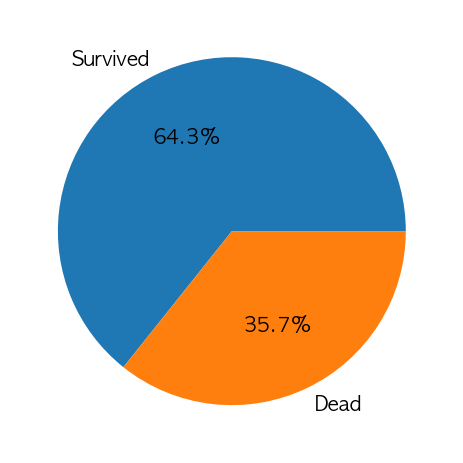

In [308]:
mask1 = (26 < train['Fare']) & (train['Fare']<= 27)
Fare = train.loc[mask1,:]
Fare[Fare['Survived']==1]
plt.pie([len(Fare[Fare['Survived']==1]), len(Fare[Fare['Survived']==0])], labels=['Survived', 'Dead'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7ffa02c9b5e0>,
 [Text(0.8426488837530798, 0.70706637503822, 'Survived'),
  Text(-0.8426488506529132, -0.7070664144854604, 'Dead')],
 [Text(0.4596266638653162, 0.38567256820266543, '22.2%'),
  Text(-0.4596266458106798, -0.385672589719342, '77.8%')])

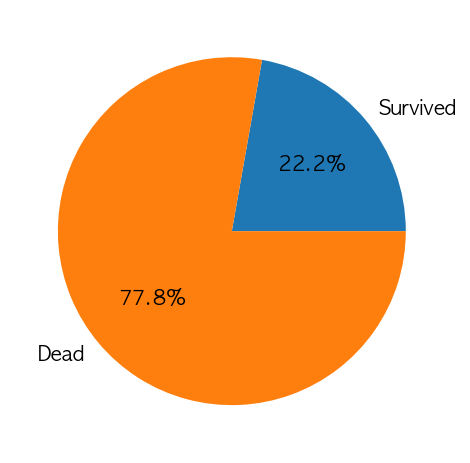

In [309]:
mask1 = (27 < train['Fare']) & (train['Fare']<= 29.7)
Fare = train.loc[mask1,:]
Fare[Fare['Survived']==1]
plt.pie([len(Fare[Fare['Survived']==1]), len(Fare[Fare['Survived']==0])], labels=['Survived', 'Dead'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7ffa02efbf70>,
 [Text(-0.8233618545088072, 0.7294348884854754, 'Survived'),
  Text(0.8233618886561178, -0.7294348499411245, 'Dead')],
 [Text(-0.449106466095713, 0.397873575537532, '76.9%'),
  Text(0.44910648472151876, -0.3978735545133406, '23.1%')])

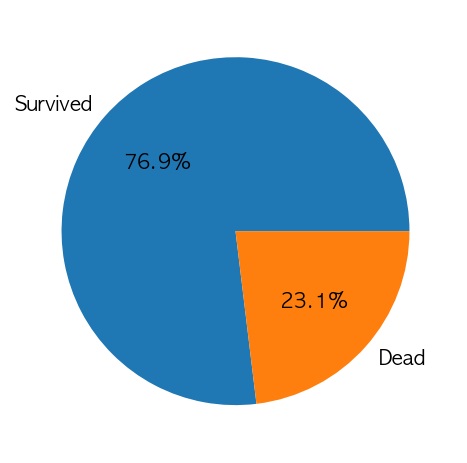

In [310]:
mask1 = (29.7 < train['Fare']) & (train['Fare']<= 30.5)
Fare = train.loc[mask1,:]
Fare[Fare['Survived']==1]
plt.pie([len(Fare[Fare['Survived']==1]), len(Fare[Fare['Survived']==0])], labels=['Survived', 'Dead'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7ffa02f683d0>,
 [Text(0.5790753482603685, 0.9352388684379692, 'Survived'),
  Text(-0.5790753482603691, -0.9352388684379688, 'Dead')],
 [Text(0.31585928086929194, 0.5101302918752558, '32.4%'),
  Text(-0.3158592808692922, -0.5101302918752556, '67.6%')])

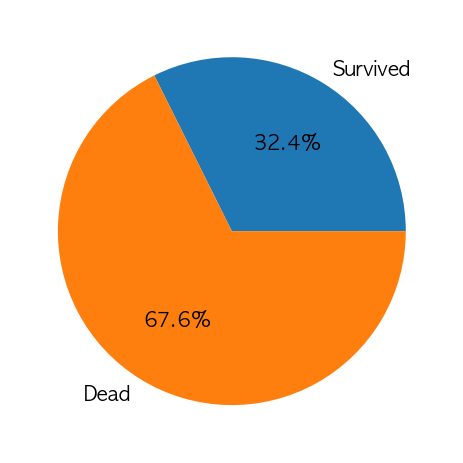

In [311]:
mask1 = (30.5 < train['Fare']) & (train['Fare']<= 50.4958)
Fare = train.loc[mask1,:]
Fare[Fare['Survived']==1]
plt.pie([len(Fare[Fare['Survived']==1]), len(Fare[Fare['Survived']==0])], labels=['Survived', 'Dead'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7ffa0092bf10>,
 [Text(-0.6524976521656738, 0.8855771078332385, 'Survived'),
  Text(0.6524975692519578, -0.8855771689244741, 'Dead')],
 [Text(-0.3559078102721857, 0.48304205881813006, '70.2%'),
  Text(0.3559077650465224, -0.4830420921406222, '29.8%')])

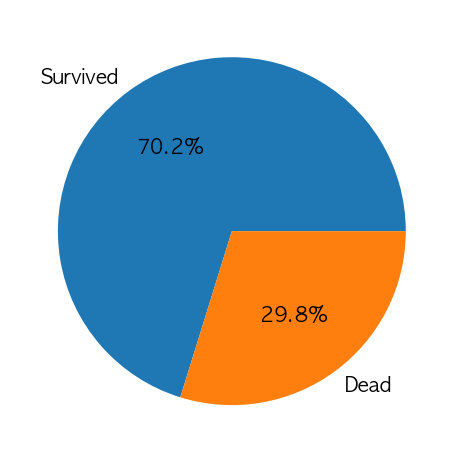

In [312]:
mask1 = ( 50.4958 < train['Fare']) & (train['Fare']<= 69.3)
Fare = train.loc[mask1,:]
Fare[Fare['Survived']==1]
plt.pie([len(Fare[Fare['Survived']==1]), len(Fare[Fare['Survived']==0])], labels=['Survived', 'Dead'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7ffa0004a130>,
 [Text(6.735557395310444e-17, 1.1, 'Survived'),
  Text(-2.0206672185931328e-16, -1.1, 'Dead')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

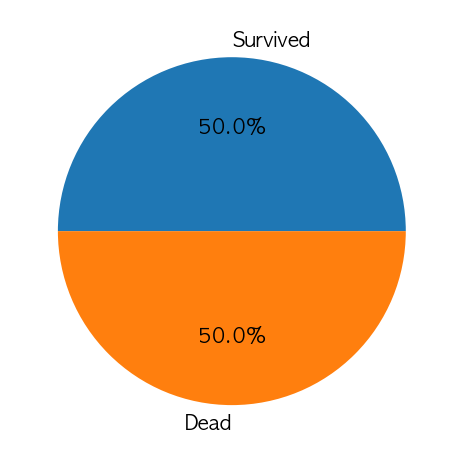

In [313]:
mask1 = ( 69.3 < train['Fare']) & (train['Fare']<= 80.00)
Fare = train.loc[mask1,:]
Fare[Fare['Survived']==1]
plt.pie([len(Fare[Fare['Survived']==1]), len(Fare[Fare['Survived']==0])], labels=['Survived', 'Dead'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7ffa0006b1c0>,
 [Text(-0.9039556379296686, 0.6267888038687084, 'Survived'),
  Text(0.9039556672717692, -0.6267887615514899, 'Dead')],
 [Text(-0.493066711598001, 0.3418848021102045, '80.7%'),
  Text(0.49306672760278314, -0.3418847790280854, '19.3%')])

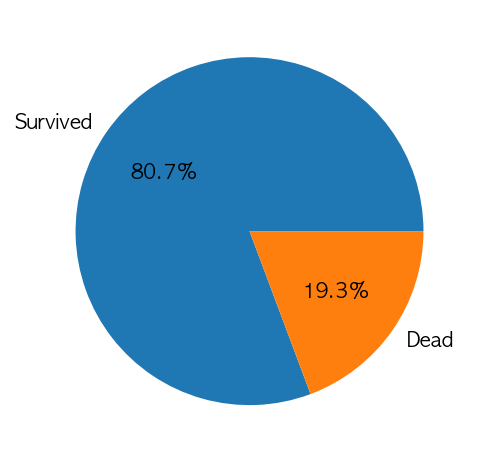

In [314]:
mask1 = ( 80.00 < train['Fare']) & (train['Fare']<= 211.3375)
Fare = train.loc[mask1,:]
Fare[Fare['Survived']==1]
plt.pie([len(Fare[Fare['Survived']==1]), len(Fare[Fare['Survived']==0])], labels=['Survived', 'Dead'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7ff9ffcd8430>,
 [Text(-0.4903122564311509, 0.9846795880860908, 'Survived'),
  Text(0.4903123486235051, -0.9846795421797401, 'Dead')],
 [Text(-0.2674430489624459, 0.5370979571378677, '64.7%'),
  Text(0.2674430992491846, -0.53709793209804, '35.3%')])

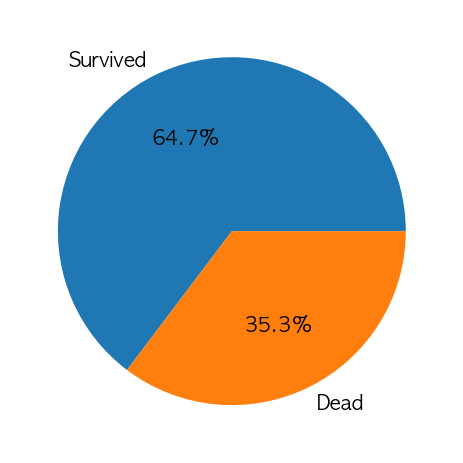

In [315]:
mask1 = ( 211.3375 < train['Fare']) & (train['Fare']<= 512.3292 )
Fare = train.loc[mask1,:]
Fare[Fare['Survived']==1]
plt.pie([len(Fare[Fare['Survived']==1]), len(Fare[Fare['Survived']==0])], labels=['Survived', 'Dead'], autopct='%1.1f%%')

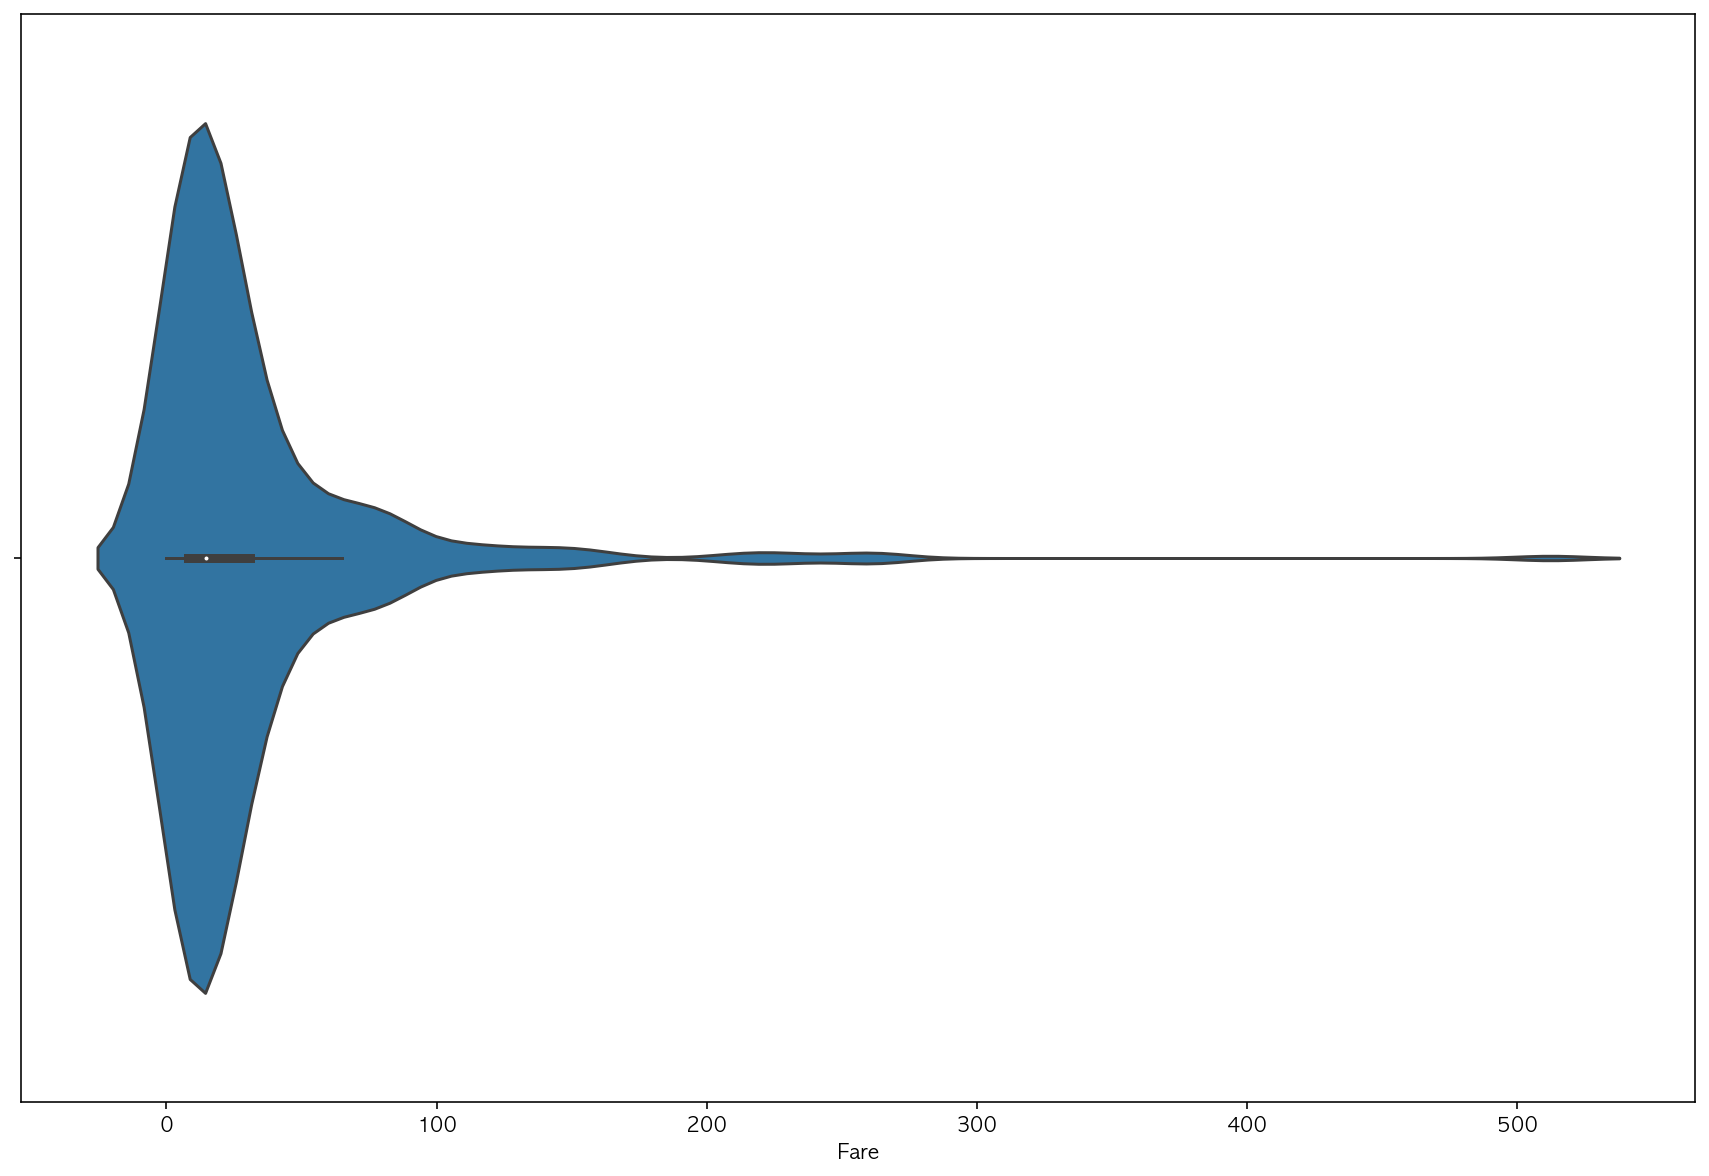

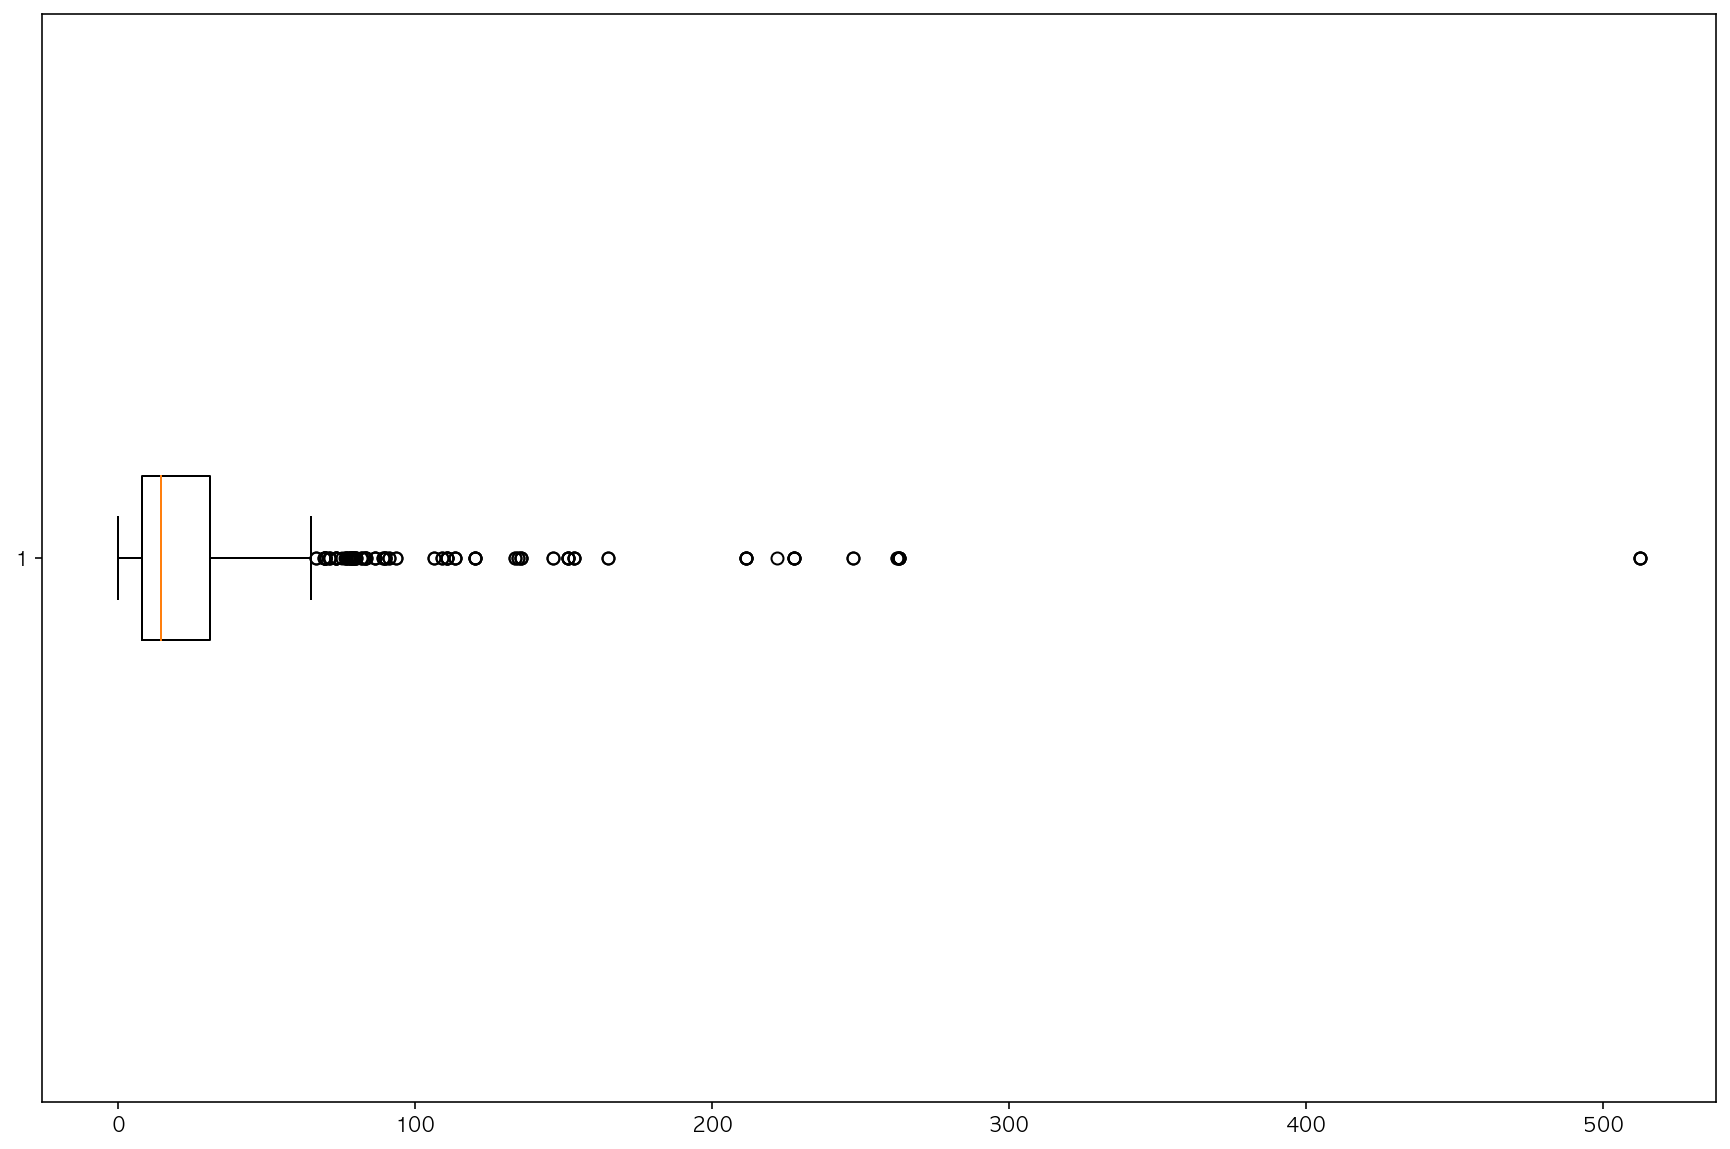

In [249]:
plt.figure(figsize=(15,10))
sns.violinplot(train['Fare'], data=train, widths=True)
plt.show()

plt.figure(figsize=(15,10))
plt.boxplot(train['Fare'], data=train, vert=False, autorange=True)
plt.show()

## 나이별/ 성별에 따른 생존률 변화

In [266]:
train['Age'].value_counts()

33.150591    119
21.818792     36
24.000000     30
22.000000     27
18.000000     26
19.000000     25
30.000000     25
28.000000     25
21.000000     24
25.000000     23
36.000000     22
29.000000     20
27.000000     18
32.000000     18
35.000000     18
26.000000     18
31.000000     17
16.000000     17
36.009174     17
34.000000     15
23.000000     15
20.000000     15
33.000000     15
39.000000     14
42.000000     14
17.000000     13
40.000000     13
45.000000     12
38.000000     11
4.000000      10
2.000000      10
50.000000     10
44.000000      9
47.000000      9
48.000000      9
54.000000      8
9.000000       8
1.000000       7
51.000000      7
41.000000      6
52.000000      6
3.000000       6
14.000000      6
37.000000      6
49.000000      6
15.000000      5
58.000000      5
43.000000      5
11.000000      4
4.574167       4
60.000000      4
56.000000      4
62.000000      4
8.000000       4
5.000000       4
65.000000      3
46.000000      3
61.000000      3
7.000000      

In [272]:
np.sort(train['Age'].unique())

array([ 0.42      ,  0.67      ,  0.75      ,  0.83      ,  0.92      ,
        1.        ,  2.        ,  3.        ,  4.        ,  4.57416667,
        5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
       10.        , 11.        , 12.        , 13.        , 14.        ,
       14.5       , 15.        , 16.        , 17.        , 18.        ,
       19.        , 20.        , 20.5       , 21.        , 21.81879195,
       22.        , 23.        , 23.5       , 24.        , 24.5       ,
       25.        , 26.        , 27.        , 28.        , 28.5       ,
       29.        , 30.        , 30.5       , 31.        , 32.        ,
       32.5       , 33.        , 33.15059055, 34.        , 34.5       ,
       35.        , 36.        , 36.00917431, 36.5       , 37.        ,
       38.        , 39.        , 40.        , 40.5       , 41.        ,
       42.        , 43.        , 44.        , 45.        , 45.5       ,
       46.        , 47.        , 48.        , 49.        , 50.  

Text(0.5, 1.0, '어린이 승선 생존률')

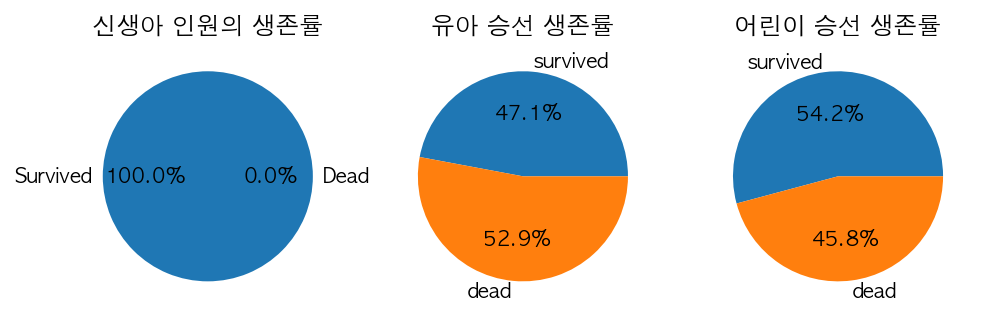

In [318]:
fig = plt.figure(figsize=(8, 5))

mask1 = (0 < train['Age']) & (train['Age']<= 0.92)
Fare = train.loc[mask1,:]
Fare[Fare['Survived']==1]

ax1 = fig.add_subplot(131)
ax1.pie([len(Fare[Fare['Survived']==1]), len(Fare[Fare['Survived']==0])], labels=['Survived', 'Dead'], autopct='%1.1f%%')
plt.title('신생아 인원의 생존률')

toddler_survived = len(train[train['Survived'] == 1] [(1 <= train['Age']) & (train['Age']<= 2)])
toddler_dead = len(train[train['Survived'] == 0] [(1 <= train['Age']) & (train['Age']<= 2)])

ax2 = fig.add_subplot(132)
ax2.pie([toddler_survived, toddler_dead], labels = ['survived', 'dead'], autopct = '%1.1f%%')
plt.title('유아 승선 생존률')

children_survived = len(train[train['Survived'] == 1] [(2 < train['Age']) & (train['Age']< 12)])
children_dead =  len(train[train['Survived'] == 0] [(2 < train['Age']) & (train['Age']< 12)])

ax3 = fig.add_subplot(133)
ax3.pie([children_survived, children_dead], labels = ['survived', 'dead'], autopct = '%1.1f%%')
plt.title('어린이 승선 생존률')


Text(0.5, 1.0, '고령자 승선 생존률')

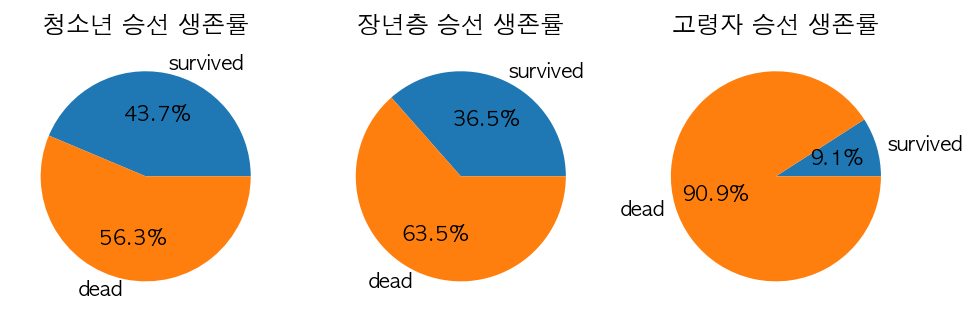

In [297]:
fig = plt.figure(figsize=(8, 5))

adolescent_survived = len(train[train['Survived'] == 1] [(12 <= train['Age']) & (train['Age']< 19)])
adolescent_dead =  len(train[train['Survived'] == 0] [(12 <= train['Age']) & (train['Age']< 19)])

ax1 = fig.add_subplot(131)
ax1.pie([adolescent_survived, adolescent_dead], labels = ['survived', 'dead'], autopct = '%1.1f%%')
plt.title('청소년 승선 생존률')

middleaged_survived = len(train[train['Survived'] == 1] [(19 <= train['Age']) & (train['Age']< 65)])
middleaged_dead = len(train[train['Survived'] == 0] [(19 <= train['Age']) & (train['Age']< 65)])

ax2 = fig.add_subplot(132)
ax2.pie([middleaged_survived, middleaged_dead], labels = ['survived', 'dead'], autopct = '%1.1f%%')
plt.title('장년층 승선 생존률')

geriatrics_survived = len(train[train['Survived'] == 1] [65 <= train['Age']])
geriatrics_dead = len(train[train['Survived'] == 0] [65 <= train['Age']])

ax3 = fig.add_subplot(133)
ax3.pie([geriatrics_survived, geriatrics_dead], labels = ['survived', 'dead'], autopct = '%1.1f%%')
plt.title('고령자 승선 생존률')

Text(0.5, 1.0, '남자 어린이 승선 생존률')

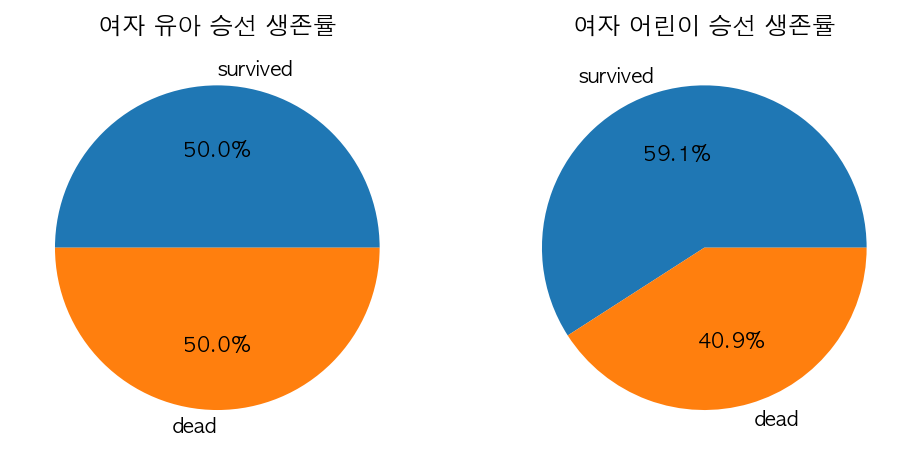

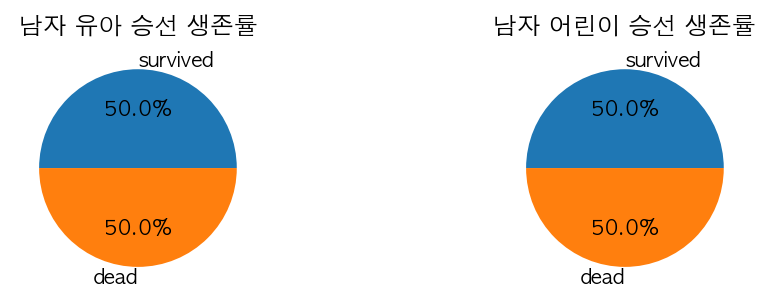

In [302]:
fig = plt.figure(figsize=(8, 5))

toddler_F_survived = len(train[train['Survived'] == 1] [(1 <= train['Age']) 
                                                        & (train['Age']<= 2)
                                                        & (train['Sex']=='female')]) 

toddler_F_dead = len(train[train['Survived'] == 0] [(1 <= train['Age']) 
                                                    & (train['Age']<= 2)
                                                    & (train['Sex']=='female')] )

ax1 = fig.add_subplot(121)
ax1.pie([toddler_F_survived, toddler_F_dead], labels = ['survived', 'dead'], autopct = '%1.1f%%')
plt.title('여자 유아 승선 생존률')

children_F_survived = len(train[train['Survived'] == 1] [(2 < train['Age']) 
                                                       & (train['Age']< 12)
                                                       & (train['Sex']=='female')])

children_F_dead =  len(train[train['Survived'] == 0] [(2 < train['Age']) 
                                                    & (train['Age']< 12)
                                                    & (train['Sex']=='female')] )

ax2 = fig.add_subplot(122)
ax2.pie([children_F_survived, children_F_dead], labels = ['survived', 'dead'], autopct = '%1.1f%%')
plt.title('여자 어린이 승선 생존률')

fig = plt.figure(figsize=(8, 5))

toddler_M_survived = len(train[train['Survived'] == 1] [(1 <= train['Age']) 
                                                        & (train['Age']<= 2)
                                                        & (train['Sex']=='male')]) 

toddler_M_dead = len(train[train['Survived'] == 0] [(1 <= train['Age']) 
                                                    & (train['Age']<= 2)
                                                    & (train['Sex']=='male')] )

ax1 = fig.add_subplot(221)
ax1.pie([toddler_F_survived, toddler_F_dead], labels = ['survived', 'dead'], autopct = '%1.1f%%')
plt.title('남자 유아 승선 생존률')

children_M_survived = len(train[train['Survived'] == 1] [(2 < train['Age']) 
                                                       & (train['Age']< 12)
                                                       & (train['Sex']=='male')])

children_M_dead =  len(train[train['Survived'] == 0] [(2 < train['Age']) 
                                                    & (train['Age']< 12)
                                                    & (train['Sex']=='male')] )

ax2 = fig.add_subplot(222)
ax2.pie([children_M_survived, children_M_dead], labels = ['survived', 'dead'], autopct = '%1.1f%%')
plt.title('남자 어린이 승선 생존률')

# 범주화 작업

## 나이별 범주화

In [438]:
# 차원 축소
train_C = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_C = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [439]:
train_C.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [440]:
test_C.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,34.5,0,0,7.8292,Q,Mr
1,3,female,47.0,1,0,7.0000,S,Mrs
2,2,male,62.0,0,0,9.6875,Q,Mr
3,3,male,27.0,0,0,8.6625,S,Mr
4,3,female,22.0,1,1,12.2875,S,Mrs


In [441]:
# 새로운 컬럼 AT(나이 범주화 컬럼) 생성
train_C['AT']= (0 < train['Age']) & (train['Age']<= 0.92)
train_C['AT']=np.where(train_C['AT']==True, 'infant', train['Age'])

# 나이 범위를 지정
toddler = (1 <= train['Age']) & (train['Age']<= 2)
children = (2 < train['Age']) & (train['Age']< 12)
adolescent = (12 <= train['Age']) & (train['Age']< 19)
middleaged = (19 <= train['Age']) & (train['Age']< 65)
geriatrics = 65 <= train['Age']

# 나이 범주를 적용
train_C['AT']=np.where(toddler, 'toddler', train_C['AT'])
train_C['AT']=np.where(children, 'children', train_C['AT'])
train_C['AT']=np.where(adolescent, 'adolescent', train_C['AT'])
train_C['AT']=np.where(middleaged, 'middleaged', train_C['AT'])
train_C['AT']=np.where(geriatrics, 'geriatrics', train_C['AT'])

train_C['AT'].unique()

array(['middleaged', 'toddler', 'adolescent', 'children', 'geriatrics',
       'infant'], dtype=object)

## Fare 범주화

In [442]:
# 새로운 컬럼 FT(요금 범주화 컬럼) 생성
train_C['FT']= 0 == train['Fare']
train_C['FT']=np.where(train_C['FT']==True, 'unsurvived', train['Fare'])

# 요금 범위를 지정
unsurvived = ((0 < train['Fare']) & (train['Fare']<= 7.4958) |
              (7.4958 < train['Fare']) & (train['Fare']<= 10.5167) |
              (27 < train['Fare']) & (train['Fare']<= 29.7) |
              (13.5 < train['Fare']) & (train['Fare']<= 16.1) |
              (19.5 < train['Fare']) & (train['Fare']<= 21.6792) |
              (23.25 < train['Fare']) & (train['Fare']<= 25.9292) |              
              (30.5 < train['Fare']) & (train['Fare']<= 50.4958)) 

half = ((10.5167 < train['Fare']) & (train['Fare']<= 13.5) |
              (train['Fare'] == 26) |
              (69.3 < train['Fare']) & (train['Fare']<= 80) )

survived = ((16.1 < train['Fare']) & (train['Fare']<= 19.5) |
              (21.6792 < train['Fare']) & (train['Fare']<= 23.25) |
              (26 < train['Fare']) & (train['Fare']<= 27) |
              (29.7 < train['Fare']) & (train['Fare']<= 30.5) |
              (50.4958 < train['Fare']) & (train['Fare']<= 69.3) |
              (80 < train['Fare']) & (train['Fare']<= 211.3375) |
              (211.3375 < train['Fare']) & (train['Fare']<= 512.3292) )

# 요금 범주를 적용
train_C['FT']=np.where(unsurvived, 'unsurvived', train_C['FT'])
train_C['FT']=np.where(half, 'half', train_C['FT'])
train_C['FT']=np.where(survived, 'survived', train_C['FT'])

train_C['FT'].unique()

array(['unsurvived', 'half', 'survived'], dtype=object)

In [446]:
train_C.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AT,FT
0,0,3,male,22.0,1,0,7.2500,S,Mr,middleaged,unsurvived
1,1,1,female,38.0,1,0,71.2833,C,Mrs,middleaged,half
2,1,3,female,26.0,0,0,7.9250,S,Miss,middleaged,unsurvived
3,1,1,female,35.0,1,0,53.1000,S,Mrs,middleaged,survived
4,0,3,male,35.0,0,0,8.0500,S,Mr,middleaged,unsurvived
